<a href="https://colab.research.google.com/github/DarshanWalchale/CP-Assignment/blob/master/FMML_M2L1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **FOUNDATIONS OF MODERN MACHINE LEARNING, IIIT Hyderabad**
### MODULE 2: Feature Normalization, Nearest Neighbor Revisited
### LAB-1 : Revisiting Nearest Neighbor Classification
#### Module Coordinator: Tanvi Kamble

---

# SECTION - 1 : Distance metrics

In [ ]:
import numpy as np
import pandas as pd
import math
from scipy.spatial import distance
import matplotlib.pyplot as plt

### **Euclidean Distance**

There is more than one way to define distance. The most familiar distance metric is probably _Euclidean distance_, which is the straight-line distance between the two points. The formula for calculating this distance is a generalization of the Pythagorean theorem:

$$ d({\bf x}, {\bf x'}) = \sqrt{\sum_{j=1}^D (x_j - x'_j)^2} $$  
  
    
                            

                              
                              

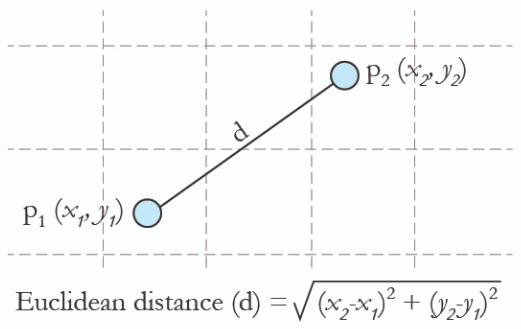

[Image Source](https://www.google.com/imgres?imgurl=https%3A%2F%2Fwww.tutorialexample.com%2Fwp-content%2Fuploads%2F2020%2F05%2FEuclidean-distance-in-tensorflow.png&imgrefurl=https%3A%2F%2Fwww.tutorialexample.com%2Fcalculate-euclidean-distance-in-tensorflow-a-step-guide-tensorflow-tutorial%2F&tbnid=xB3LUnhOEpdklM&vet=12ahUKEwj_qrjI3dfxAhXTJCsKHX_7DDgQMygDegUIARDLAQ..i&docid=AIcC7trk2GUB6M&w=521&h=329&q=euclidean%20distance&ved=2ahUKEwj_qrjI3dfxAhXTJCsKHX_7DDgQMygDegUIARDLAQ)

In [ ]:
# Simple 2D example
x_1 = np.array((1, 2))
x_2 = np.array((4, 6))

In [ ]:
# Naive approach to calculating Euclidean distance (not-vectorized)
sumv = 0
for i in range(len(x_1)):
  sumv += ((x_1[i]-x_2[i])**2)
dist = math.sqrt(sumv)
print(dist)

5.0


In [ ]:
## TASK
## Write a vectorized version of computing Euclidean distance (using numpy) in the space given below
## (Expected number of lines ~ 1). Your answer should be stored in the variable 'euclidean_dist'
## Verify this result with what you saw above

# Write your code below and uncomment the lines below in order to run the cell.

# euclidean_dist = 
# print(euclidean_dist)

In [ ]:
#@title Answer to Task-1
# Answer:
euclidean_dist = np.sqrt(np.sum((x_1-x_2)**2))
print(euclidean_dist)

5.0


In [ ]:
# Libraries such as SciPy provide functions to compute different kinds of distance metrics between points
euclidean_dist = distance.euclidean(x_1, x_2)
print(euclidean_dist)

5.0


In [ ]:
# 3-D Visualization
plotx = np.linspace(-10,10,50)
meshx, meshy = np.meshgrid(plotx,plotx)

In [ ]:
tempeuclid = np.sqrt((meshx**2 + meshy**2))

In [ ]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Surface(z=tempeuclid, x=plotx, y=plotx)])
fig.update_layout(title='Euclidean Distance from origin', autosize=False,
                  width=1000, height=1000,
                  margin=dict(l=65, r=50, b=65, t=90))
fig.show()

### **Manhattan Distance**

Euclidean distance is not the only way to measure how far apart two points are. [**Manhattan distance**](https://en.wikipedia.org/wiki/Taxicab_geometry) (also called _taxicab distance_) measures the distance a taxicab in would have to drive to travel from A to B. Taxicabs cannot travel in a straight line because they have to follow the street grid. But there are multiple paths along the street grid that all have exactly the same length; the Manhattan distance is the length of any one of these shortest paths.
The formula for Manhattan distance is as follows:
$$ d({\bf x}, {\bf x'}) = \sum_{j=1}^D |x_j - x'_j| $$  
  
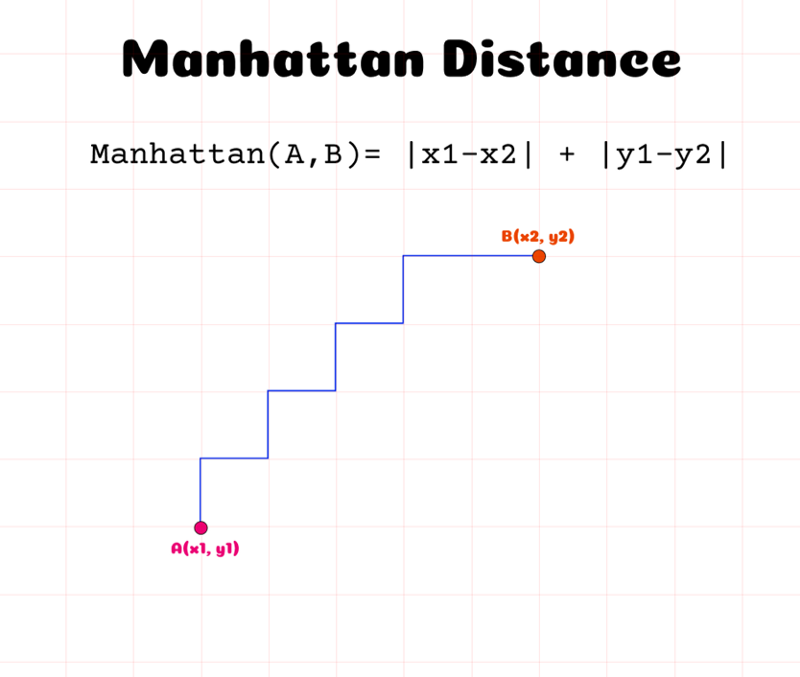  


[Image Source](https://www.google.com/url?sa=i&url=https%3A%2F%2Faigents.co%2Fblog%2Fpublication%2Fdistance-metrics-for-machine-learning&psig=AOvVaw3oUdVhaRKBIADWyXWDUoLZ&ust=1625576456552000&source=images&cd=vfe&ved=0CAoQjRxqFwoTCOC6pa3-y_ECFQAAAAAdAAAAABAD)

In [ ]:
# Libraries such as SciPy provide functions to compute different kinds of distance metrics between points
# x_1 = np.array((1, 2))
# x_2 = np.array((4, 6))
manhattan_dist = distance.cityblock(x_1, x_2)
print(manhattan_dist)

7


In [ ]:
## TASK
## Write a vectorized version of computing Manhattan distance (using numpy) in the space given below
## (Expected number of lines ~ 1). Your answer should be stored in the variable 'manhattan_dist'
## Verify your result with the output of the scipy function in the previous cell.

# Write your code below and uncomment the lines below in order to run the cell.

# manhattan_dist = 
# print(manhattan_dist)

In [ ]:
#@title Answer to Task-2
# Answer:
manhattan_dist = np.sum(np.abs((x_1 - x_2)))
print(manhattan_dist)

7


In [ ]:
# 3-D visualization
plotx = np.linspace(-10,10,50)
meshx, meshy = np.meshgrid(plotx,plotx)

In [ ]:
tempmanhattan = np.abs(meshx) + np.abs(meshy)

In [ ]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Surface(z=tempmanhattan, x=plotx, y=plotx)])
fig.update_layout(title='Manhattan Distance from origin', autosize=False,
                  width=1000, height=1000,
                  margin=dict(l=65, r=50, b=65, t=90))
fig.show()

### **Hamming Distance**

Hamming distance is slightly different from the distance metrics previously discussed, and is applied in certain kinds of machine learning problems. It measures similarity between two strings of the same length.
The Hamming Distance between two strings of **the same length** is the number of positions at which the corresponding characters are different.

In [ ]:
str_1 = 'euclidean'
str_2 = 'manhattan'
hamming_dist = distance.hamming(list(str_1), list(str_2)) * len(str_1)
print(hamming_dist)

# Note that the answer will be 7, as except for the last two letters ('a' and 'n'), all
# the other corresponding letters in the two strings are different.

7.0


### **Cosine Similarity**

This is a measure of "similarity" (note that this is different from distance) between two non-zero vectors of an inner product space. Range: [-1,1].  
$$ \text{cosine similarity}(A,B)  = \frac{A \cdot B}{\lVert A \rVert \lVert B \rVert}$$
  


In [ ]:
from numpy.linalg import norm

# x_1 = np.array((1, 2))
# x_2 = np.array((4, 6))

cosine_similarity = 1 - distance.cosine(x_1,x_2)
print(cosine_similarity)

cosine_similarity = np.dot(x_1, x_2)/(norm(x_1)*norm(x_2))
print(cosine_similarity)

0.9922778767136677
0.9922778767136677


### **Minkowski Distance**

Minkowski distance is a generalized form of Euclidean and Manhattan distance. We can raise the absolute difference to any power $p$ and take the $p$th root. The formula for Minkowski distance is:
$$ d({\bf x}, {\bf x'}) = \left(\sum_{j=1}^D |x_j - x'_j|^p\right)^{1/p}. $$
Manhattan distance and Euclidean distance are special cases of Minkowski distance for $p=1$ and $p=2$, respectively.

In [ ]:
# x_1 = np.array((1, 2))
# x_2 = np.array((4, 6))
minkowski_distance = distance.minkowski(x_1, x_2, p=3)
print("Minkowski distance when p=3 is ",minkowski_distance)

Minkowski distance when p=3 is  4.497941445275415


In [ ]:
# You can verify that this distance is the same as Manhattan dist when p=1,
# and Euclidean dist when p=2

minkowski_dist_p1 = distance.minkowski(x_1,x_2,p=1)
print("Minkowski distance when p=1 is ",minkowski_dist_p1)
minkowski_dist_p2 = distance.minkowski(x_1,x_2,p=2)
print("Minkowski distance when p=2 is ",minkowski_dist_p2)

Minkowski distance when p=1 is  7.0
Minkowski distance when p=2 is  5.0


### **Chebyshev Distance**

Chebyshev distance is also called the L∞ metric. It is a metric defined on a vector space where the distance between two vectors is the greatest of their differences along any coordinate dimension. Simply explained, it is the maximum distance along one axis.  
$$ d_{chebyshev}(x,y) = \max_{i}(\lvert x_i - y_i \rvert) $$

In [ ]:
# x_1 = np.array((1, 2))
# x_2 = np.array((4, 6))

chebyshev_distance = distance.chebyshev(x_1,x_2)
print(chebyshev_distance)

4


### **Jaccard Distance**
The Jaccard distance is a metric that measures dissimilarity between sample sets.  
$$ \text{Jaccard Index ie, } J(A,B) = \frac{\lvert A \cap B \rvert}{\lvert A \cup B \rvert}$$
$$ \text{Jaccard Distance ie, } d_{J}(A,B) = 1 - J(A,B) = 1 -\frac{\lvert A \cap B \rvert}{\lvert A \cup B \rvert}$$

In [ ]:
## In the context of binary vectors, let's say:
## a = no. of indices where vector1[i] == 1 == vector2[i]
## b = no. of indices where vector1[i] == 0 and vector2[i] == 1
## c = no. of indices where vector1[i] == 1 and vector2[i] == 0
## d = no. of indices where vector1[i] == 0 == vector2[i]
## Jaccard-distance = 1 - [a/(a+b+c)]

print(distance.jaccard([1, 0, 0], [0, 1, 0]))
print(distance.jaccard([1, 0, 0], [1, 1, 0]))
print(distance.jaccard([1, 0, 0], [1, 1, 1]))

1.0
0.5
0.6666666666666666


In [ ]:
def jaccard_similarity(a, b):
    c = a.intersection(b)
    return float(len(c)) / (len(a) + len(b) - len(c))

list1 = ['dog', 'cat', 'rat']
list2 = ['dog', 'cat', 'mouse', 'rabbit']
# The intersection is ['dog', 'cat']
# union is ['dog', 'cat', 'rat', 'mouse, 'rabbit']
words1 = set(list1)
words2 = set(list2)
print("Jaccard similarity is :",jaccard_similarity(words1, words2))
print("Jaccard distance is :", 1-jaccard_similarity(words1, words2))

Jaccard similarity is : 0.4
Jaccard distance is : 0.6


## **How to decide the appropriate distance metric ?**

1. **Euclidean distance**: The most widely used metric in KNN classification problems, since it calculates the straight line distance between two points.  

2. **Manhattan distance**: In some cases, Manhattan distance maybe preferable over Euclidean distances. For eg: For data with high dimensionality, Manhattan distance maybe more useful. When Euclidean distance is defined using many coordinates, there is not a lot of difference in the distances between different pairs of points. This is due to the **Curse of Dimensionality**, ie, "*when the dimensionality increases, the volume of the space increases so fast that the available data become sparse*".  
Manhattan distance is a more appropriate metric to use if the data is, for example, in the form of a grid. For instance, if the data consists of several houses that are arranged in the form of a grid and connected by roads, Euclidean distance is not an appropriate indicator of the distance between the houses, as in real-life, one would take the roads to travel between two points, thus making Manhattan distance a more suitable metric.  

3. **Cosine Similarity**: Cosine similarity is commonly used in text-analytics and document comparison problems. It is also used in collaborative filtering-based recommendation systems.  It is used when the magnitude of the vectors is not of importance.

4. **Hamming Distance**: It is commonly used to measure the distance between categorical variables.  

5. **Jaccard Index**: The Jaccard index is often used in applications where binary data is used. It can also be used in text similarity analysis to measure how much word choice overlap there is between documents

#SECTION - 2 : K-Nearest Neighbor Classifier

### What is KNN ?

K-NN (K- Nearest Neighbours) is a classification technique where the output is a class membership.  
An object is classified by a **plurality vote of its neighbors**, with the object being assigned to the class most common among its k nearest neighbors (k is a positive integer, typically small). If k = 1, then the object is simply assigned to the class of that single nearest neighbor.  

### What is so unique about KNN ?  
First off, KNN is a **supervised learning** algorithm, ie, the idea is to learn a function that can map an input to an output given some example pairs.  

It is a **non-parametric** algorithm, since it doesn't assume anything about the form of the mapping function, which makes it very flexible to use. Certain algorithms are parametric (such as Naive Bayes), which are constrained as they require a specified form. KNN can, thus, be a good algorithm to try if the form is unknown.  

Moreover, KNN is an **instance-based algorithm**, since it compares new problems/inputs with those which were seen during model training and that were stored in memory. 

In [50]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from collections import Counter

In [51]:
def predict(X_train, y_train, X_test, k):
    distances = []
    targets = []

    for i in range(len(X_train)):
        # compute and store L2 distance
        distances.append([np.sqrt(np.sum(np.square(X_test - X_train[i, :]))), i])

    distances = sorted(distances)

    for i in range(k):
        index = distances[i][1]
        targets.append(y_train[index])

    # return most common target
    return Counter(targets).most_common(1)[0][0]

In [52]:
def k_nearest_neighbor(X_train, y_train, X_test, k):

    assert k <= len(X_train), "[!] K cannot be larger than number of samples."

    # loop over all observations
    predictions = []
    for i in range(len(X_test)):
        predictions.append(predict(X_train, y_train, X_test[i, :], k))

    return np.asarray(predictions)

**Note** : If k = 1 then the algorithm will simply return the label of the nearest neighbour. When we give k > 1 the most common label out of the given labels in the k neighbours will be selected.The code for 1 NN is given as follows and does not have to be so complicated. 

In [53]:
def NN1(traindata, trainlabel, query):
  diff  = traindata - query  # find the difference between features. Numpy automatically takes care of the size here 
  sq = diff*diff # square the differences
  dist = sq.sum(1) # add up the squares
  label = trainlabel[np.argmin(dist)] # our predicted label is the label of the training data which has the least distance from the query
  return label

Let us define a metric 'Accuracy' to see how good our learning algorithm is. Accuracy is the ratio of the number of correctly classified samples to the total number of samples. The higher the accuracy, the better the algorithm. 

In [54]:
def Accuracy(gtlabel, predlabel):
  assert len(gtlabel)==len(predlabel), "Length of the groundtruth labels and predicted labels should be the same"
  correct = (gtlabel==predlabel).sum() # count the number of times the groundtruth label is equal to the predicted label.
  return correct/len(gtlabel)

Let's try it out on Iris Dataset present in the scikit learn library

In [55]:
from sklearn.datasets import load_iris
import pandas as pf
data = load_iris()

df = pd.DataFrame(data=data.data, columns=data.feature_names)

df["target"] = data.target

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [56]:
X = np.array(df[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']])
y = np.array(df['target'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=17)

In [57]:
# Making our predictions
predictions = k_nearest_neighbor(X_train, y_train, X_test, 7)

# evaluating accuracy
accuracy = Accuracy(y_test, predictions)
print("The accuracy of our classifier is {} %".format(100*accuracy))

The accuracy of our classifier is 94.0 %


In [58]:
predictions

array([0, 1, 2, 1, 1, 1, 1, 2, 1, 2, 2, 0, 1, 0, 2, 0, 0, 2, 2, 2, 1, 0,
       2, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 2, 1, 0, 1, 1, 0, 1,
       2, 1, 1, 2, 1, 0])

Voila! You have implemented your own version of the K-Nearest Neighbours algorithm, which works very well on the Iris Dataset. Congratulations!  

Now try out the sklearn implementation and compare your results.  

In [59]:
from sklearn.neighbors import KNeighborsClassifier

sklearn_knn = KNeighborsClassifier(n_neighbors=7)
sklearn_knn.fit(X_train,y_train)
sklearn_predictions = sklearn_knn.predict(X_test)
accuracy = accuracy_score(y_test, sklearn_predictions)
print("The accuracy of Sklearn classifier is {} %".format(100*accuracy))

The accuracy of Sklearn classifier is 94.0 %


### Weighted NN
For KNN, If k is too small, the algorithm would be more sensitive to outliers. If k is too large, then the neighborhood may include too many points from other classes. We also take the label with max votes in the neighbourhood. Another choice can be that instead of giving equal weights to each of the neighbours we can give weighted points in the neighbourhood. So we weigh points by the inverse of their distance. Therefore, closer points will be given a higher priority as compared to the far off points.

An easy way to implement this is by specifying the 'weights' parameter as distance when defining the sklearn KNN function. For more information go through this [site](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)

In [ ]:
## TASK
## Modify the KNN function you wrote to return all the K-nearest neighbours along with their distances,
## instead of just the output that was most common. You don't need to find out accuracy, just modify the function
## and return the k-nearest neighbours and distances.

In [37]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from collections import Counter

In [38]:
# returns a 2D list of label, distance
def find_knn(X_train, y_train, X_test, k):
    distances = []
    targets = []

    for i in range(len(X_train)):
        # compute and store L2 distance
        distances.append([np.sqrt(np.sum(np.square(X_test - X_train[i, :]))), i])

    # distances i holds [dist, index]
    distances = sorted(distances)


    for i in range(k):
        index = distances[i][1]
        targets.append([y_train[index], distances[i][0]])

    print(targets)

    # return most common target
    return targets

In [43]:
def k_nearest_neighbor(X_train, y_train, X_test, k):

    assert k <= len(X_train), "[!] K cannot be larger than number of samples."

    # loop over all observations
    predictions = []
    for i in range(len(X_test)):
        predictions.append(find_knn(X_train, y_train, X_test[i, :], k))

    return np.asarray(predictions)

In [44]:
from sklearn.datasets import load_iris
import pandas as pf
data = load_iris()

df = pd.DataFrame(data=data.data, columns=data.feature_names)

df["target"] = data.target

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [45]:
X = np.array(df[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']])
y = np.array(df['target'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=17)

In [ ]:
# Making our predictions
predictions = k_nearest_neighbor(X_train, y_train, X_test, 7)

# evaluating accuracy
# accuracy = Accuracy(y_test, predictions)
# print("The accuracy of our classifier is {} %".format(100*accuracy))

In [ ]:
predictions

## Understanding Decision Boundaries  
We have implemented KNN, and also seen our algorithm's performance in terms of accuracy.   
Wouldn't it also be great to know how exactly these 'votes' or neighbours are decided through some kind of visualization?  


### Decision Boundary

Voronoi Diagram gives us a good idea of the points present in our dataset, to understand how KNN performed on our dataset we can plot decision boundaries. Decision boundaries, as the name suggests, divide the plane into different regions of classification.  

Note that here again, for simplicity, we have only considered first two attributes of the DataFrame (ie, Sepal Length and Sepal Width).  

In [62]:
from matplotlib.colors import ListedColormap
import seaborn as sns
import matplotlib.pyplot as plt


def decision_boundary_plot(x_dec,y_dec,k):
  h = .02  # step size in the mesh

  # Create color maps
  n = len(set(y_dec))
  cmap_light = ListedColormap(['pink', 'green', 'cyan','yellow'][:n])
  cmap_bold = ['pink', 'darkgreen', 'blue','yellow'][:n]

  for weights in ['uniform', 'distance']:
      # we create an instance of Neighbours Classifier and fit the data.
      clf = KNeighborsClassifier(n_neighbors=k, weights=weights)
      clf.fit(x_dec, y_dec)

      # Plot the decision boundary. For that, we will assign a color to each
      # point in the mesh [x_min, x_max]x[y_min, y_max].
      x_min, x_max = x_dec[:, 0].min() - 1, x_dec[:, 0].max() + 1
      y_min, y_max = x_dec[:, 1].min() - 1, x_dec[:, 1].max() + 1
      xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                          np.arange(y_min, y_max, h))
      Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

      # Put the result into a color plot
      Z = Z.reshape(xx.shape)
      plt.figure(figsize=(8, 6))
      plt.contourf(xx, yy, Z, cmap=cmap_light)

      # Plot also the training points
      sns.scatterplot(x=x_dec[:, 0], y=x_dec[:, 1], hue=y_dec,
                      palette=cmap_bold, alpha=1.0, edgecolor="black")
      plt.xlim(xx.min(), xx.max())
      plt.ylim(yy.min(), yy.max())
      plt.title("Multi-Classification (k = %i, weights = '%s')"% (k, weights))

  plt.show()


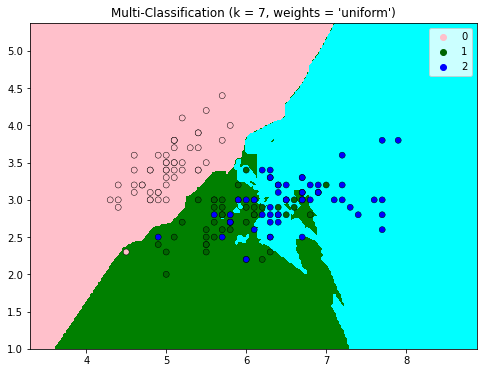

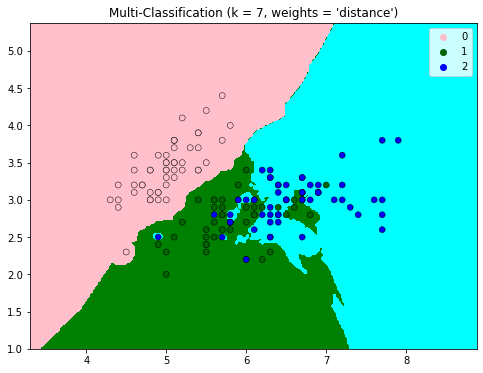

In [63]:
x_pts = X[:,:2]
y_pts = y
decision_boundary_plot(x_pts,y_pts,7)

## Confusion Matrix  
In classification problems, a confusion matrix, also known as an error matrix, is a table that allows visualization of the performance of an algorithm, typically a supervised learning one. Each row of the matrix represents the instances in an actual class while each column represents the instances in a predicted class.

In [67]:
from sklearn.metrics import confusion_matrix

In [70]:
print(confusion_matrix(y_test,predictions))
pd.crosstab(y_test, predictions, rownames=['True'], colnames=['Predicted'], margins=True)

[[13  0  0]
 [ 0 22  0]
 [ 0  3 12]]


Predicted,0,1,2,All
True,,,,
0,13,0,0,13
1,0,22,0,22
2,0,3,12,15
All,13,25,12,50


Text(0.5, 15.0, 'Predicted label')

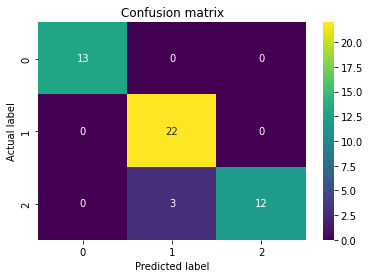

In [80]:
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, predictions)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="viridis" ,fmt='g')
plt.title('Confusion matrix', y = 1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

## Classification Report

Precision, Recall, and F1-Score are other metrics besides accuracy that one might look for in an algorithm.  Depending on the use-case, one might consider one metric more important than the other.  

Note: *T-> True, F->False, P->Positive, N->Negative*
    
Mathematically, Accuracy is :  

$Accuracy = \frac{TP+TN}{TP+TN+FP+FN}$  

**Precision**: The accuracy of positive predictions


$Precision = \frac{TP}{TP+FP}$ 

**Recall**:Fraction of positives that were correctly identified


$Recall = \frac{TP}{TP+FN}$


**F1-score**: Harmonic mean of precision and recall  


$F1 = \frac{2*Precision*Recall}{Precision+Recall} = \frac{2*TP}{2*TP+FP+FN}$  



In [81]:
#import classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.88      1.00      0.94        22
           2       1.00      0.80      0.89        15

    accuracy                           0.94        50
   macro avg       0.96      0.93      0.94        50
weighted avg       0.95      0.94      0.94        50



## Performance Metrics
The AUC - ROC curve is a performance measurement for classification problems at various threshold settings. ROC is a probability curve and AUC represents the degree or measure of separability. It tells how much the model is capable of distinguishing between classes.
The diagonal in the curve divides the ROC space. Points above the diagonal represent good classification results (better than random); points below the line represent bad results (worse than random).
Higher the AUC, the better the model is at predicting 0 classes as 0 and 1 classes as 1.

The ROC curve is plotted with the TPR (True Positive Rate) on the y-axis, and the FPR (False Positive Rate) on the x-axis.

In [82]:
## AUC-ROC
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt

def plot_roc(y_test,predicted):
  y_scores = predicted
  fpr, tpr, threshold = roc_curve(y_test, y_scores)
  roc_auc = auc(fpr, tpr)
  plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
  plt.legend(loc = 'lower right')
  plt.plot([0, 1], [0, 1],'r--')
  plt.xlim([0, 1])
  plt.ylim([0, 1])
  plt.ylabel('True Positive Rate')
  plt.xlabel('False Positive Rate')
  plt.title('Receiver Operating Characteristic')
  plt.show()

In [83]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 17)

In [84]:
sklearn_knn = KNeighborsClassifier(n_neighbors=7)
sklearn_knn.fit(X_train,y_train)
sklearn_predictions = sklearn_knn.predict(X_test)
accuracy = accuracy_score(y_test, sklearn_predictions)
print("The accuracy of Sklearn classifier is {} %".format(100*accuracy))

The accuracy of Sklearn classifier is 92.5531914893617 %


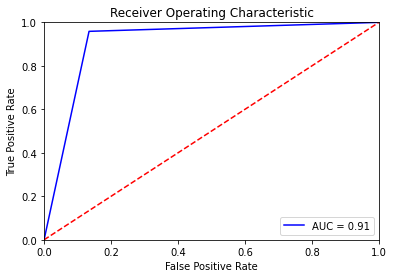

In [85]:
plot_roc(y_test,sklearn_predictions)

In [86]:
len(y_test)

188

# SECTION - 2.1: KNN on a Synthetic Dataset

In the previous section, you saw different kinds of distance metrics and their values on two sample 2-dimensional points.   
This section covers use of distance metrics in a KNN classifier for synthetic two-dimensional data. 

In [87]:
import random
import scipy.stats as ss
from sklearn.neighbors import KNeighborsClassifier

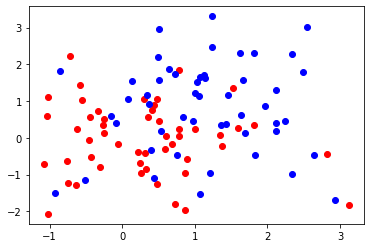

In [88]:
def generate_synth_data(n = 50):
    points = np.concatenate((ss.norm(0, 1).rvs((n, 2)), ss.norm(1, 1).rvs((n, 2))), axis = 0)
    outcomes = np.concatenate((np.repeat(0, n), np.repeat(1, n)))
    return (points, outcomes)

n = 50
pts,tgts = generate_synth_data(n) #generates 100 points
# print(tgts)
plt.figure()
plt.plot(pts[:n, 0], pts[:n, 1], "ro")
plt.plot(pts[n:, 0], pts[n:, 1], "bo")
plt.show()

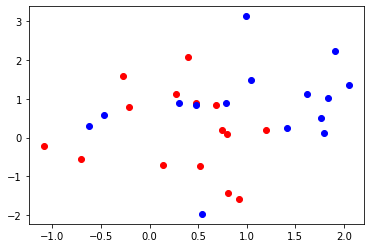

In [89]:
n = 15
test_pts,test_tgts = generate_synth_data(n)
# print(test_tgts)
plt.figure()
plt.plot(test_pts[:n, 0], test_pts[:n, 1], "ro")
plt.plot(test_pts[n:, 0], test_pts[n:, 1], "bo")
plt.show()

In [109]:
## TASK
## The code given below is that of a KNN classifier, provided by Scikit-learn.
## The parameter 'metric' includes various distance metric options, including those 
## we learnt above- manhattan, euclidean, minkowski,chebyshev, hamming, etc.

## Try out different metrics and observe changes in the accuracy, if any. Don't change value of 'k'
## Also, experiment with different metrics and observe if they are applicable for this kind of data.
## If there are any additional parameters needed, for instance, 'p' in case of Minkowski distance, include them.

knn = KNeighborsClassifier(n_neighbors = 3, weights='distance', metric='minkowski', p = 3)
knn.fit(pts, tgts)
our_predictions = knn.predict(test_pts)
print("Prediction Accuracy: ")
print(100 * np.mean(our_predictions == test_tgts))

Prediction Accuracy: 
73.33333333333333


# SECTION - 2.2: KNN on a Real World dataset

The Iris flower data set or Fisher's Iris data set is a multivariate data set that consists of 50 samples from each of three species of Iris (*Iris setosa, Iris virginica and Iris versicolor*). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters.

In [110]:
from sklearn.datasets import load_iris
iris = load_iris()
data = pd.DataFrame(iris.data, columns=iris.feature_names)
# data['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)
data['target'] = pd.Series(iris.target)
data.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [117]:
import scipy.spatial as ssp

In [118]:
np.random.seed(123)
indices = np.random.permutation(data.shape[0])
div = int(0.65 * len(indices))
train_idx, test_idx = indices[:div], indices[div:]

train_set, test_set = data.loc[train_idx,:], data.loc[test_idx,:]
test_class = list(test_set.iloc[:,-1])
train_class = list(train_set.iloc[:,-1])

In [126]:
def dist_euclidean(X1,X2):           
    return ssp.distance.euclidean(X1,X2)

In [131]:
def dist_cosine(X1,X2):           
    return ssp.distance.cosine(X1,X2)

In [132]:
def dist_manhattan(X1,X2):           
    return ssp.distance.cityblock(X1,X2)

In [133]:
def dist_chebyshev(X1,X2):           
    return ssp.distance.chebyshev(X1,X2)

In [134]:
metrics_list = [dist_euclidean,dist_cosine, dist_manhattan, dist_chebyshev]
for dist_metric in metrics_list:
  knn = KNeighborsClassifier(n_neighbors = 3, metric=dist_metric)
  knn.fit(train_set, train_class)
  our_predictions = knn.predict(test_set)
  print(dist_metric.__name__)
  print("Prediction Accuracy: ")
  print(100 * np.mean(our_predictions == test_class))
  print()

dist_euclidean
Prediction Accuracy: 
100.0

dist_cosine
Prediction Accuracy: 
100.0

dist_manhattan
Prediction Accuracy: 
100.0

dist_chebyshev
Prediction Accuracy: 
100.0



---
### Questions to Think About and Answer: 

1. How are similarity and distance different from each other?  

2. Are there any conditions for a particular distance to be considered a "distance metric"? 




### Useful Resources for further reading
1.   [Analytics Vidhya: Distance metrics](https://www.analyticsvidhya.com/blog/2020/02/4-types-of-distance-metrics-in-machine-learning/)
2.   [Scikit learn distance metric documentation](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.DistanceMetric.html)



# SECTION - 3 : Feature Normalization

## Imputation of Missing Values 
There can be situations when there are some readings missing in our data. This creates outliers and brings in ambiguity. We cannot just fill in random values as that would result n wrong entries and the model might start behaving weitrdly to accomodate these features. There are various ways in which we can deal with this problem.

1. **Ignoring the Entries**: The simplest methosd is to ignore the entries which have missing values for some features. This way we will not have any ambiguity or wrong entry but our dataset will become smaller.
2. **Imputation Using (Mean/Median) Values:**: The missing values can be put as a mean or median of all the other values. This will give us features which the model can easily learn and won't affect the overall performance of our machine learning model. 
3. **Imputation Using (Most Frequent) or (Zero/Constant) Values:** It works with categorical features (strings or numerical representations) by replacing missing data with the most frequent values within each column. However this can create a bias in the model if there are too many missing values. 
4. **Imputation Using k-NN**: This method is very useful as it relies on feature similarity to assign the missing feature. We can perform a KNN and make the missing feature as the label. The semantically closest label based on the bneighbourhood will be assigned to the missing value. This method is much more accurate as compared to the other methods. 
5. **Imputation using Neural Networks** : We can use feature encoders and other neural networks to fill in the missing values as well. This method is computationally expnsive but the most effecient out of the methods that we have discussed. 

## Why is feature normalization required? 
Sometimes the features of our data have vastly different scales. This will cause the learning algorithm to give more importance to certain features, reducing its performance. Data normalization is a method in which we transform the features so that they have similar scales. 

Some commonly used feature scaling techniques are Min-Max scaling, clipping, log Normalization and z-score normalization. 

## Min-Max Scaling 
First, we will talk about the simplest one: rescaling or Min-Max Scaling. 

$$\begin{equation}
x' = \frac {x -min(x)} { max(x) - min(x)}
\end{equation}$$



For more information, see [this page](https://towardsdatascience.com/data-normalization-in-machine-learning-395fdec69d02).

In [135]:
def rescale(data):
  return (data - data.min())/(data.max() - data.min())

We have to apply the rescaling to each feature individually. Also remember to apply the same transform we are using on the train set to the test set. Let's try to apply transformations on the MNIST dataset.

In [136]:
from keras.datasets import mnist
import matplotlib.pyplot as plt

In [137]:
#@title Helper Functions for plotting data
def plotData(X, y, xlabel = 'hole', ylabel = 'bound', fig=None, ax = None):

  if fig is None:
    fig, ax = plt.subplots()
  for ii in range(nclasses):
    plt.scatter(X[y==ii,0], X[y==ii, 1])
  plt.legend([str(i) for i in range(nclasses)])
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  lim2 = X.max() 
  lim1 = X.min() 
  add = abs(lim1-lim2)/5
  return fig, ax


In [138]:
## Code for 1 Nearest Neighbours. 

def NN1(traindata, trainlabel, query):
  diff  = traindata - query  # find the difference between features. Numpy automatically takes care of the size here 
  sq = diff*diff # square the differences
  dist = sq.sum(1) # add up the squares
  label = trainlabel[np.argmin(dist)] # our predicted label is the label of the training data which has the least distance from the query
  return label

def NN(traindata, trainlabel, testdata):
  # we will run nearest neighbour for each sample in the test data 
  # and collect the predicted classes in an array using list comprehension
  predlabel = np.array([NN1(traindata, trainlabel, i) for i in testdata])
  return predlabel

def Accuracy(gtlabel, predlabel):
  assert len(gtlabel)==len(predlabel), "Length of the groundtruth labels and predicted labels should be the same"
  correct = (gtlabel==predlabel).sum() # count the number of times the groundtruth label is equal to the predicted label.
  return correct/len(gtlabel)

def cumArray(img):
  img2 = img.copy()
  for ii in range(1, img2.shape[1]):
    img2[ii,:] = img2[ii,:] + img2[ii-1,:]  # for every row, add up all the rows above it.
  img2 = img2>0
  return img2

def getHolePixels(img):
  im1 = cumArray(img)
  im2 = np.rot90(cumArray(np.rot90(img)), 3) # rotate and cumulate it again for differnt direction
  im3 = np.rot90(cumArray(np.rot90(img, 2)), 2)
  im4 = np.rot90(cumArray(np.rot90(img, 3)), 1)
  hull =  im1 & im2 & im3 & im4 # this will create a binary image with all the holes filled in.
  hole = hull & ~ (img>0) # remove the original digit to leave behind the holes
  return hole

def getHullPixels(img):
  im1 = cumArray(img)
  im2 = np.rot90(cumArray(np.rot90(img)), 3) # rotate and cumulate it again for differnt direction
  im3 = np.rot90(cumArray(np.rot90(img, 2)), 2)
  im4 = np.rot90(cumArray(np.rot90(img, 3)), 1)
  hull =  im1 & im2 & im3 & im4 # this will create a binary image with all the holes filled in.
  return hull

def minus(a, b):
  return a & ~ b

def getBoundaryPixels(img):
  img = img.copy()>0  # binarize the image
  rshift = np.roll(img, 1, 1)
  lshift = np.roll(img, -1 ,1)
  ushift = np.roll(img, -1, 0)
  dshift = np.roll(img, 1, 0)
  boundary = minus(img, rshift) | minus(img, lshift) | minus(img, ushift) | minus(img, dshift)
  return boundary



In [139]:
#loading the dataset
(train_X, train_y), (test_X, test_y) = mnist.load_data()
train_X = train_X/255
test_X = test_X/255

nclasses = 4

# get only for the first 4 classes
train_X = train_X[train_y<nclasses]
train_y = train_y[train_y<nclasses]
test_X = test_X[test_y<nclasses]
test_y = test_y[test_y<nclasses]

train_X = train_X[::100].copy() # We are only taking a subset of the training set
train_y = train_y[::100].copy() # do the same to the labels
test_X = test_X[::100].copy() # taking a subset of the test set. This code takes every 500th sample
test_y = test_y[::100].copy()

# get all the features
train_hole = np.array([getHolePixels(i).sum() for i in train_X])
test_hole = np.array([getHolePixels(i).sum() for i in test_X])
train_bound = np.array([getBoundaryPixels(i).sum() for i in train_X])
test_bound = np.array([getBoundaryPixels(i).sum() for i in test_X])
# train_hull = np.array([getHullPixels(i).sum() for i in train_X])
# test_hull = np.array([getHullPixels(i).sum() for i in test_X])
# train_sum = np.sum(train_X, (1,2))/(28*28)
# test_sum = np.sum(test_X, (1,2))/(28*28)

# create the train and test set by combining the appropriate features
train_feats = np.vstack((train_hole,train_bound)).transpose()
test_feats = np.vstack((test_hole, test_bound)).transpose()

11501568/11490434 [==============================] - 0s 0us/step


Text(0.5, 1.0, 'Data before scalng')

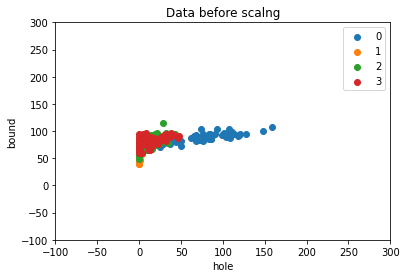

In [140]:
xlim=[-100,300]
ylim=[-100,300]
fig, ax = plotData(train_feats, train_y)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.set_title("Data before scalng")

In [141]:
test_pred = NN(train_feats, train_y, test_feats)
acc = Accuracy(test_y, test_pred)
print('Baseline accuracy = ', acc)

Baseline accuracy =  0.7619047619047619


In [142]:
train_feats_rescaled_x = rescale(train_feats[:,0])
train_feats_rescaled_y = rescale(train_feats[:,1])
train_feats_rescaled = np.stack((train_feats_rescaled_x, train_feats_rescaled_y),1)

test_feats_rescaled_x = rescale(test_feats[:,0])
test_feats_rescaled_y = rescale(test_feats[:,1])
test_feats_rescaled = np.stack((test_feats_rescaled_x, test_feats_rescaled_y),1)

Text(0.5, 1.0, 'Data after scalng')

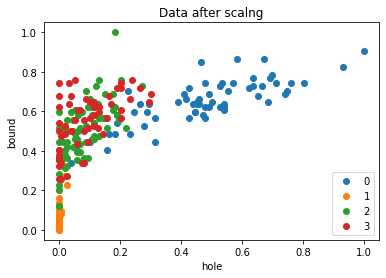

In [143]:
fig, ax = plotData(train_feats_rescaled, train_y)
ax.set_title("Data after scalng")

In [144]:
test_pred = NN(train_feats_rescaled, train_y, test_feats_rescaled)
acc = Accuracy(test_y, test_pred)
print('Accuracy after transform = ', acc)

Accuracy after transform =  0.8095238095238095


## Z-Score Clipping


Standardization or z-score normalization is one such scaling technique that transforms your data such that the resulting distribution has a mean of 0 and a standard deviation of 1. 

$$ \text{New (scaled) value} = {X - \mu \over \sigma}$$ 

In [145]:
X = cancer.data
y = cancer.target

In [146]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [147]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.33, random_state = 17)

In [148]:
#For 7 neighbours
knn = KNeighborsClassifier(n_neighbors = 7)
knn.fit(X_train,y_train)
scores = knn.score(X_test,y_test)
print("Score after Z clipping", scores)

Score after Z clipping 0.9521276595744681


In [ ]:
## TASK:
## Plot a confusion matrix for the classification above on the scaled data (using the optimal value of k)
## Also print out the Precision, Recall and F1-score values

In [ ]:
## TASK:
## Perform K-Fold Cross validation after standardizing the data. Display your results.

## Log Normalization

Log normalization is a method for standardizing your data that can be useful when you have a particular column with high variance. 
This is a very simple method where log is applied to each values of the column so that the vales come into a range and are not very large. 
we can simply use the **np.log** function of the numpy library on the entire columne so the code will look something like 

```
 df['Normalized Column'] = np.log(df['Original Column'])
```



In [ ]:
# TASK
# Try to find the difference in the accuracy when we apply log normalization on one of the columns and
# plot the results for knn classification with 2-10 neighbours.

## Clipping

Clipping involves the capping of all values below or above a certain value. Clipping is useful when a column contains some outliers. We can set a maximum vmax and a minimum value vmin and set all outliers greater than the maximum value to vmax and all the outliers lower than the minimum value to vmin.

Let's take the data from the iris dataset and try to prform clipping on it 

In [ ]:
from sklearn.datasets import load_iris
import pandas as pf
data = load_iris()

df = pd.DataFrame(data=data.data, columns=data.feature_names)

df["target"] = data.target


In [ ]:
df['ID'] = range(1, len(df) + 1)

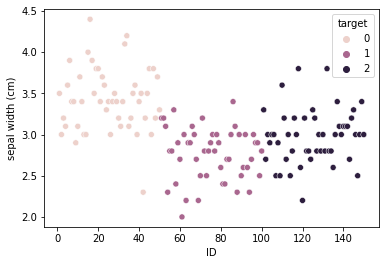

In [ ]:
import seaborn as sns
sns.scatterplot(data=df, x="ID",y="sepal width (cm)",hue="target")

Lets keep the vmin to 2 cm and vmax as 4.2 cm and see the results after clipping.

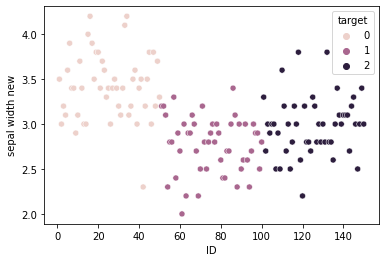

In [ ]:
vmax = 4.2
vmin = 2
df['sepal width new'] = df['sepal width (cm)'].apply(lambda x: vmax if x > vmax else vmin if x < vmin else x)
sns.scatterplot(data=df, x="ID",y="sepal width new",hue="target")

### Task
Different metrics respond differently to the different feature normalizations. Try to apply one of the feature normalization and see how the distance metrics change. 